# Proyecto de Mineria de Datos:

Descripción: Este proyecto tiene como objetivo comprobar la relación entre la popularidad de los animes con las evaluaciones que estos reciben en el sitio web MyAnimeList

Integrantes:

*   Ricardo Aliste G.
*   Rodrigo Carmona R.



# Importación de Librerias

In [1]:
!pip install pandas_profiling==2.9.0

     |████████████████████████████████| 266kB 13.1MB/s 
     |████████████████████████████████| 604kB 23.4MB/s 
     |████████████████████████████████| 71kB 13.1MB/s 
     |████████████████████████████████| 71kB 11.9MB/s 
     |████████████████████████████████| 3.1MB 57.5MB/s 
     |████████████████████████████████| 296kB 43.9MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=d6dddc36c4ac53c7cede435cfb81d80799c46908462f3dace055d0bfec4124cf
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built htmlmin
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
  Found existing installation: pandas-profiling 1.4.1
    Uninstalling pandas-profiling-1.4.1:
      Successfully uninstalled pandas-profiling-1.4.1


In [2]:
!pip install factor_analyzer==0.2.3

In [3]:
!pip install mglearn

     |████████████████████████████████| 542kB 20.6MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=12e33a0e51080e1fe0fedca99d75194dfec8f24511fe5ace911b16eb00e1c2df
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [4]:
# Librerias particulares
import urllib
import mglearn
import graphviz
from graphviz import Digraph

# Librerias escenciales
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np 
import pandas as pd 

# Librerias para analisis PCA
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

# Librerias de Analisis y entrenamiento de Clasificadores
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Regresion Logistica
from sklearn.linear_model import LogisticRegression

#Librerias para MLP (Keras)
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

#Libreria de SVM
from sklearn.svm import SVC, NuSVC

#Libreria de Clasificador Gaussiano
from sklearn.naive_bayes import GaussianNB

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Arbol de Decision
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

# K-means
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

#Reportes
import pandas_profiling
from pandas_profiling import ProfileReport

# Conexion con Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Pre-procesado del Conjunto de Datos

In [5]:
"""
URLs del CSV:
Ricardo: /content/drive/MyDrive/Mineria de Datos/Trabajo Semestral/
Rodrigo: /content/drive/MyDrive/Proyecto MDD/
"""
ruta = '/content/drive/MyDrive/Mineria de Datos/Trabajo Semestral/'
anime_df = pd.read_csv(ruta+"Anime_data.csv")
data_clean = anime_df.dropna(inplace=True)
anime_df.head(3)

Anime_id  ...                                               Link
0         1  ...       https://myanimelist.net/anime/1/Cowboy_Bebop
1         5  ...  https://myanimelist.net/anime/5/Cowboy_Bebop__...
2         6  ...             https://myanimelist.net/anime/6/Trigun

[3 rows x 15 columns]

In [6]:
anime_df=anime_df[['Anime_id', 'Genre', 'Type', 'Producer', 'Studio', 'Rating', 'ScoredBy', 'Popularity', 'Members', 'Episodes', 'Source']]
df_base=anime_df['Anime_id']
anime_df.head(3)

Anime_id  ...    Source
0         1  ...  Original
1         5  ...  Original
2         6  ...     Manga

[3 rows x 11 columns]

In [7]:
genero=np.array(anime_df['Genre'])
tipo=np.array(anime_df['Type'])
productor=np.array(anime_df['Producer'])
studio=np.array(anime_df['Studio'])
fuente=np.array(anime_df['Source'])

In [8]:
print(np.unique(genero))
print("---------------------------------------------------")
print(np.unique(tipo))
print("---------------------------------------------------")
print(np.unique(productor))
print("---------------------------------------------------")
print(np.unique(studio))
print("---------------------------------------------------")
print(np.unique(fuente))

["['Action', 'Adventure', 'Cars', 'Comedy', 'Sci-Fi', 'Shounen']"
 "['Action', 'Adventure', 'Comedy', 'Demons', 'Drama', 'Ecchi', 'Horror', 'Mystery', 'Romance', 'Sci-Fi']"
 "['Action', 'Adventure', 'Comedy', 'Demons', 'Shounen', 'Supernatural']"
 ... "['Supernatural', 'Slice of Life']" "['Supernatural']"
 "['Thriller', 'Sci-Fi']"]
---------------------------------------------------
['Movie' 'Music' 'ONA' 'OVA' 'Special' 'TV']
---------------------------------------------------
["['4Kids Entertainment', 'Nintendo']" "['501st JOINT FIGHTER WING']"
 "['5pb.']" ...
 "['m.o.e.', 'Media Factory', 'Half H.P Studio', 'Houbunsha', 'Index', 'Toranoana']"
 "['m.o.e.', 'Pony Canyon']" "['m.o.e.']"]
---------------------------------------------------
["['10Gauge']" "['8bit']" "['A-1 Pictures', 'Bridge']"
 "['A-1 Pictures', 'CLOVERWORKS']" "['A-1 Pictures', 'Ordet']"
 "['A-1 Pictures', 'TROYCA']" "['A-1 Pictures', 'Trigger', 'CLOVERWORKS']"
 "['A-1 Pictures']" "['A-Real']" "['A.C.G.T.']" "['ACC Pro

## Tipo

In [9]:
anime_df.Type[(anime_df.Type=='Movie')]=0
anime_df.Type[(anime_df.Type=='Music')]=1
anime_df.Type[(anime_df.Type=='ONA')]=2
anime_df.Type[(anime_df.Type=='OVA')]=3
anime_df.Type[(anime_df.Type=='Special')]=4
anime_df.Type[(anime_df.Type=='TV')]=5
anime_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

Anime_id  ...    Source
0         1  ...  Original
1         5  ...  Original
2         6  ...     Manga
3         7  ...  Original
5        15  ...     Manga

[5 rows x 11 columns]

## Fuente

In [10]:
fuente=['4-koma manga', 'Book', 'Card game', 'Digital manga', 'Game', 'Light novel', 'Manga', 'Music', 'Novel', 'Original', 
        'Picture book', 'Radio', 'Visual novel', 'Web manga', 'Other', 'Unknown']
        
anime_df.Source[(anime_df.Source == '4-koma manga')]=0
anime_df.Source[(anime_df.Source == 'Book')]=1
anime_df.Source[(anime_df.Source == 'Card game')]=2
anime_df.Source[(anime_df.Source == 'Digital manga')]=3
anime_df.Source[(anime_df.Source == 'Game')]=4
anime_df.Source[(anime_df.Source == 'Light novel')]=5
anime_df.Source[(anime_df.Source == 'Manga')]=6
anime_df.Source[(anime_df.Source == 'Music')]=7
anime_df.Source[(anime_df.Source == 'Novel')]=8
anime_df.Source[(anime_df.Source == 'Original')]=9
anime_df.Source[(anime_df.Source == 'Picture book')]=10
anime_df.Source[(anime_df.Source == 'Radio')]=11
anime_df.Source[(anime_df.Source == 'Visual novel')]=12
anime_df.Source[(anime_df.Source == 'Web manga')]=13
anime_df.Source[(anime_df.Source == 'Other')]=14
anime_df.Source[(anime_df.Source == 'Unknown')]=15
anime_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A va

Anime_id                                              Genre  ... Episodes Source
0         1  ['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...  ...     26.0      9
1         5  ['Action', 'Space', 'Drama', 'Mystery', 'Sci-Fi']  ...      1.0      9
2         6  ['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...  ...     26.0      6
3         7  ['Action', 'Magic', 'Police', 'Supernatural', ...  ...     26.0      9
5        15          ['Action', 'Sports', 'Comedy', 'Shounen']  ...    145.0      6

[5 rows x 11 columns]

## Conversion con Arrays


In [11]:
def get_unique_data(arr):
  arr_names_list=[]
  for anime_personal_list in arr:
    aux=anime_personal_list.split("'")[1]
    if(aux not in arr_names_list):
      arr_names_list.append(aux)
  return arr_names_list

def get_puntual_data(word):
  word=word.split("'")[1]
  return word

def get_puntual_index(word, arr):
  return arr.index(word)

In [12]:
lista_genero=get_unique_data(genero)
lista_productor=get_unique_data(productor)
lista_studio=get_unique_data(studio)

print(len(lista_genero),lista_genero)
print(len(lista_productor),lista_productor)
print(len(lista_studio),lista_studio)

38 ['Action', 'Comedy', 'Drama', 'Sci-Fi', 'Samurai', 'Game', 'Adventure', 'Harem', 'Slice of Life', 'Military', 'Space', 'Music', 'Mecha', 'Supernatural', 'Historical', 'Mystery', 'Magic', 'School', 'Horror', 'Ecchi', 'Fantasy', 'Sports', 'Dementia', 'Psychological', 'Romance', 'Demons', 'Hentai', 'Kids', 'Police', 'Parody', 'Shounen', 'Cars', 'Martial Arts', 'Thriller', 'Josei', 'Seinen', 'Shoujo', 'Super Power']
461 ['Bandai Visual', 'Sunrise', 'Victor Entertainment', 'TV Tokyo', 'Genco', 'OB Planning', 'VAP', 'Production I.G', 'GDH', 'Group TAC', 'Marvelous', 'Movic', 'Aniplex', 'Fuji TV', 'Mainichi Broadcasting System', 'TV Tokyo Music', 'Sony Pictures Entertainment', 'Youmex', 'TBS', 'Lantis', 'Kadokawa Shoten', 'Mellow Head', 'Tatsunoko Production', 'Starchild Records', 'Sotsu', 'Atelier Musa', 'TV Asahi', 'Pony Canyon', 'Animax', 'Nihon Ad Systems', 'Audio Tanaka', 'NHK', 'm.o.e.', 'Pioneer LDC', 'Trinet Entertainment', 'Media Factory', 'Studio Fantasia', 'Geneon Universal Ente

### Genero

In [13]:
for i in range(0, len(genero)):
  genero[i]=get_puntual_index(get_puntual_data(genero[i]), lista_genero)

genero

array([0, 0, 0, ..., 11, 0, 8], dtype=object)

In [14]:
anime_df.Genre=genero
anime_df.head()

Anime_id Genre Type  ...   Members Episodes  Source
0         1     0    5  ...  704490.0     26.0       9
1         5     0    0  ...  179899.0      1.0       9
2         6     0    5  ...  372709.0     26.0       6
3         7     0    5  ...   74889.0     26.0       9
5        15     0    5  ...  106468.0    145.0       6

[5 rows x 11 columns]

### Productor

In [15]:
for i in range(0, len(productor)):
  productor[i]=get_puntual_index(get_puntual_data(productor[i]), lista_productor)

productor

array([0, 1, 2, ..., 223, 460, 422], dtype=object)

In [16]:
anime_df.Producer=productor
anime_df.head()

Anime_id Genre Type Producer  ... Popularity   Members  Episodes  Source
0         1     0    5        0  ...       39.0  704490.0      26.0       9
1         5     0    0        1  ...      475.0  179899.0       1.0       9
2         6     0    5        2  ...      158.0  372709.0      26.0       6
3         7     0    5        0  ...     1278.0   74889.0      26.0       9
5        15     0    5        3  ...      888.0  106468.0     145.0       6

[5 rows x 11 columns]

### Studio

In [17]:
for i in range(0, len(studio)):
  studio[i]=get_puntual_index(get_puntual_data(studio[i]), lista_studio)

studio

array([0, 1, 2, ..., 339, 171, 338], dtype=object)

In [18]:
anime_df.Studio=studio
anime_df.head()

Anime_id Genre Type Producer  ... Popularity   Members  Episodes  Source
0         1     0    5        0  ...       39.0  704490.0      26.0       9
1         5     0    0        1  ...      475.0  179899.0       1.0       9
2         6     0    5        2  ...      158.0  372709.0      26.0       6
3         7     0    5        0  ...     1278.0   74889.0      26.0       9
5        15     0    5        3  ...      888.0  106468.0     145.0       6

[5 rows x 11 columns]


## Tablas Descriptivas de Codigos

In [19]:
tipo=np.unique(tipo)
n_tipo=[]

fuente=np.unique(fuente)
n_fuente=[]

n_genero=[]
n_productor=[]
n_studio=[]

for i in range(0, len(tipo)):
  n_tipo.append([i, tipo[i]])

for i in range(0, len(fuente)):
  n_fuente.append([i, fuente[i]])

for i in range(0, len(lista_genero)):
  n_genero.append([i, lista_genero[i]])

for i in range(0, len(lista_productor)):
  n_productor.append([i, lista_productor[i]])

for i in range(0, len(lista_studio)):
  n_studio.append([i, lista_studio[i]])

df_tipo = pd.DataFrame(data=n_tipo, columns=["Codigo", "Traducción"])
df_fuente = pd.DataFrame(data=n_fuente, columns=["Codigo", "Traducción"])
df_genero = pd.DataFrame(data=n_genero, columns=["Codigo", "Traducción"])
df_productor = pd.DataFrame(data=n_productor, columns=["Codigo", "Traducción"])
df_studio = pd.DataFrame(data=n_studio, columns=["Codigo", "Traducción"])

In [20]:
"""
URLs del CSV:
Ricardo: /content/drive/MyDrive/Mineria de Datos/Trabajo Semestral/
Rodrigo: /content/drive/MyDrive/Proyecto MDD/
"""
df_tipo.to_csv(r'/content/drive/MyDrive/Mineria de Datos/Trabajo Semestral/ Codigo_Tipos.csv', index = False)
df_fuente.to_csv(r'/content/drive/MyDrive/Mineria de Datos/Trabajo Semestral/ Codigo_Fuentes.csv', index = False)
df_genero.to_csv(r'/content/drive/MyDrive/Mineria de Datos/Trabajo Semestral/ Codigo_Generos.csv', index = False)
df_productor.to_csv(r'/content/drive/MyDrive/Mineria de Datos/Trabajo Semestral/ Codigo_Productores.csv', index = False)
df_studio.to_csv(r'/content/drive/MyDrive/Mineria de Datos/Trabajo Semestral/ Codigo_Studios.csv', index = False)

## Generacion de Clases segun Popularidad

In [21]:
anime_df.describe()

Anime_id       Rating  ...       Members     Episodes
count   4479.000000  4479.000000  ...  4.479000e+03  4479.000000
mean   13786.506363     6.946890  ...  5.850495e+04    16.805537
std    12788.259222     0.855212  ...  1.192538e+05    46.984973
min        1.000000     2.330000  ...  1.400000e+01     1.000000
25%     2062.500000     6.430000  ...  2.874500e+03     1.000000
50%     8840.000000     7.010000  ...  1.378100e+04    12.000000
75%    26104.000000     7.520000  ...  5.971150e+04    22.000000
max    39022.000000    10.000000  ...  1.451708e+06  1818.000000

[8 rows x 6 columns]

In [22]:
df=anime_df
df.loc[:, 'C_Popular'] = None
df.loc[df.Popularity <= 3528, 'C_Popular'] = 0 # Alta Popularidad
df.loc[df.Popularity > 3528, 'C_Popular'] = 1 # Escasa Popularidad
df.C_Popular.values.astype('int')
df.C_Popular.value_counts()

0    2240
1    2239
Name: C_Popular, dtype: int64

In [23]:
df=df[['Genre','Type','Source','Producer','Studio','Rating','Members','ScoredBy','Episodes','C_Popular']]
df.to_csv(r'/content/drive/MyDrive/Mineria de Datos/Trabajo Semestral/Anime_Procesado.csv', index = False)
df.head()

Genre Type Source Producer  ...   Members  ScoredBy  Episodes  C_Popular
0     0    5      9        0  ...  704490.0  363889.0      26.0          0
1     0    0      9        1  ...  179899.0  111187.0       1.0          0
2     0    5      6        2  ...  372709.0  197451.0      26.0          0
3     0    5      9        0  ...   74889.0   31875.0      26.0          0
5     0    5      6        3  ...  106468.0   48765.0     145.0          0

[5 rows x 10 columns]

# Re-Ingreso de Datos Procesados

In [24]:
anime_df = pd.read_csv(ruta+" Anime_Procesado.csv")
anime_df.head()

Genre  Type  Source  Producer  ...   Members  ScoredBy  Episodes  C_Popular
0      0     5       9         0  ...  704490.0  363889.0      26.0          0
1      0     0       9         1  ...  179899.0  111187.0       1.0          0
2      0     5       6         2  ...  372709.0  197451.0      26.0          0
3      0     5       9         0  ...   74889.0   31875.0      26.0          0
4      0     5       6         3  ...  106468.0   48765.0     145.0          0

[5 rows x 10 columns]

# Reporte y Analisis de Dataframe Transformado

In [25]:
profile = ProfileReport(anime_df)
profile

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Detectar Outliers

Rating

In [26]:
bi_rating = 0.5345501956 - (1.5 * 0.1421121252)
bs_rating = 0.6766623207 + (1.5 * 0.1421121252)

### Ajuste por limites maximo y minimo
if(bi_rating<anime_df['Rating'].min()):
  bi_rating=anime_df['Rating'].min()
if(bs_rating>anime_df['Rating'].max()):
  bs_rating=anime_df['Rating'].max()

### Imprimir valores finales de los limites de caja
print("Limite Inferior:", bi_rating, "  Limite Superior:", bs_rating)
print("----------------------")
ubicacion_outliers = (anime_df['Rating']<bi_rating) | (anime_df['Rating']>bs_rating)
print(" Ubicacion Outliers 'Rating'")
ubicacion_outliers

Limite Inferior: 2.33   Limite Superior: 0.8898305085
----------------------
 Ubicacion Outliers 'Rating'


0       True
1       True
2       True
3       True
4       True
        ... 
4474    True
4475    True
4476    True
4477    True
4478    True
Name: Rating, Length: 4479, dtype: bool

In [27]:
outliers_rating=anime_df[ubicacion_outliers].sort_values("Rating")
outliers_rating['Rating']

307      2.33
4336     2.50
1944     2.61
4407     2.89
4226     3.19
        ...  
3486     9.15
3598     9.16
3836     9.19
1851     9.25
4478    10.00
Name: Rating, Length: 4479, dtype: float64

ScoredBy

In [28]:
bi_scoreby = 0.0009908163154 - (1.5 * 0.02465512735)
bs_scoreby = 0.02564594367 + (1.5 * 0.02465512735)

### Ajuste por limites maximo y minimo
if(bi_scoreby<anime_df['ScoredBy'].min()):
  bi_scoreby=anime_df['ScoredBy'].min()
if(bs_scoreby>anime_df['ScoredBy'].max()):
  bs_scoreby=anime_df['ScoredBy'].max()

### Imprimir valores finales de los limites de caja
print("Limite Inferior:", bi_scoreby, "  Limite Superior:", bs_scoreby)
print("----------------------")
ubicacion_outliers = (anime_df['ScoredBy']<bi_scoreby) | (anime_df['ScoredBy']>bs_scoreby)
print(" Ubicacion Outliers 'ScoredBy'")
ubicacion_outliers

Limite Inferior: 1.0   Limite Superior: 0.062628634695
----------------------
 Ubicacion Outliers 'ScoredBy'


0       True
1       True
2       True
3       True
4       True
        ... 
4474    True
4475    True
4476    True
4477    True
4478    True
Name: ScoredBy, Length: 4479, dtype: bool

In [29]:
outliers_scoredby=anime_df[ubicacion_outliers].sort_values('ScoredBy')
outliers_scoredby['ScoredBy']

4478          1.0
4399          1.0
4424          2.0
4241          3.0
4455          3.0
          ...    
3563     687965.0
1851     730784.0
2513     913806.0
2745     936784.0
846     1006242.0
Name: ScoredBy, Length: 4479, dtype: float64

Members

In [30]:
bi_members = 0.001970456584 - (1.5 * 0.03915219048)
bs_members = 0.04112264706 + (1.5 * 0.03915219048)

### Ajuste por limites maximo y minimo
if(bi_members<anime_df['Members'].min()):
  bi_members=anime_df['Members'].min()
if(bs_members>anime_df['Members'].max()):
  bs_members=anime_df['Members'].max()

### Imprimir valores finales de los limites de caja
print("Limite Inferior:", bi_members, "  Limite Superior:", bs_members)
print("----------------------")
ubicacion_outliers = (anime_df['Members']<bi_members) | (anime_df['Members']>bs_members)
print(" Ubicacion Outliers 'Members'")
ubicacion_outliers

Limite Inferior: 14.0   Limite Superior: 0.09985093278000001
----------------------
 Ubicacion Outliers 'Members'


0       True
1       True
2       True
3       True
4       True
        ... 
4474    True
4475    True
4476    True
4477    True
4478    True
Name: Members, Length: 4479, dtype: bool

In [31]:
outliers_members=anime_df[ubicacion_outliers].sort_values('Members')
outliers_members['Members']

4399         14.0
4407         31.0
4455         34.0
4451         36.0
4435         37.0
          ...    
3563    1015163.0
1851    1194518.0
2513    1297309.0
2745    1340641.0
846     1451708.0
Name: Members, Length: 4479, dtype: float64

# Analisis de Datos (PCA)

In [32]:
col_names=['Genre','Type','Source','Producer','Studio','Rating','Members','ScoredBy','Episodes']
df_data=anime_df[col_names].values

pca=PCA()
pca.fit(df_data)

transformer=pca.transform(df_data)

Text(0, 0.5, 'PCA 2')

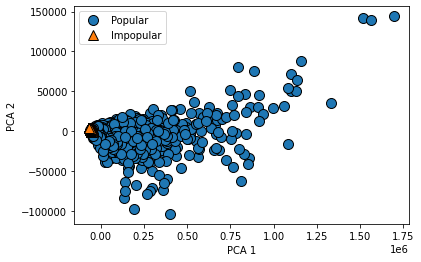

In [33]:
mglearn.discrete_scatter(transformer[:,0], transformer[:,1], anime_df.C_Popular)
plt.legend(['Popular', 'Impopular'], loc='best')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

Text(0, 0.5, 'PCA 2')

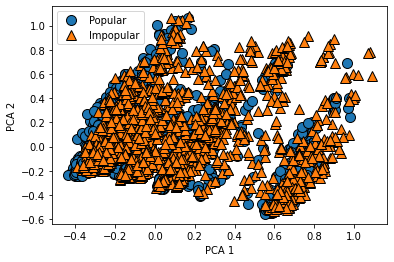

In [34]:
#Escalar información
escala = MinMaxScaler()
escala.fit(df_data)
escalada = escala.transform(df_data)
#Entrenar PCA con la data escalada
pca.fit(escalada)
#Transformar la información mediante PCA
transformada = pca.transform(escalada)
#Gráfico en relación al objetivo
mglearn.discrete_scatter(transformada[:,0], transformada[:,1], anime_df.C_Popular)
plt.legend(['Popular', 'Impopular'], loc='best')
plt.gca()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [35]:
df_for_PCA=anime_df[col_names]
df_for_PCA.head(2)

Genre  Type  Source  Producer  Studio  Rating   Members  ScoredBy  Episodes
0      0     5       9         0       0    8.81  704490.0  363889.0      26.0
1      0     0       9         1       1    8.41  179899.0  111187.0       1.0

In [36]:
chi_square_value, p_value = calculate_bartlett_sphericity(df_for_PCA)
chi_square_value, p_value

(20017.023836342065, 0.0)

In [37]:
if(p_value<0.05):
  print("OK")
else:
  print("NO OK")

OK


In [38]:
kmo_all, kmo_model = calculate_kmo(df_for_PCA)
kmo_model

0.5669668076051186

In [39]:
fa = FactorAnalyzer()
fa.analyze(df_for_PCA, len(col_names), rotation = None)
ev, v = fa.get_eigenvalues()
ev

Original_Eigenvalues
0              2.559875
1              1.398204
2              1.142750
3              1.046841
4              0.862782
5              0.821658
6              0.589577
7              0.567077
8              0.011236

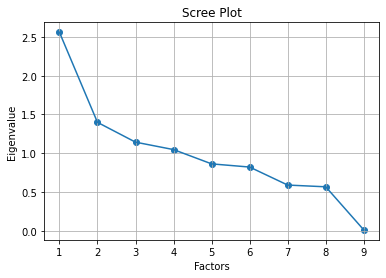

In [40]:
plt.scatter(range(1, df_for_PCA.shape[1]+1),ev)
plt.plot(range(1, df_for_PCA.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [41]:
fa = FactorAnalyzer()
fa.analyze(df_for_PCA, 5, rotation = "varimax")
fa.loadings

Factor1   Factor2   Factor3   Factor4   Factor5
Genre    -0.074269  0.015167 -0.079938  0.159554  0.239878
Type      0.071588 -0.091188  0.986057 -0.062897  0.075366
Source   -0.097525  0.011510 -0.029156  0.725654  0.033440
Producer -0.081027  0.950654 -0.107667  0.042709  0.267130
Studio    0.008483  0.236600 -0.043443 -0.086853  0.512210
Rating    0.398975 -0.102308  0.022381 -0.244055 -0.360736
Members   0.987211 -0.034623  0.111906 -0.098518 -0.063665
ScoredBy  0.976169 -0.030557  0.080106 -0.066997 -0.050254
Episodes  0.034292 -0.012198  0.226717 -0.007317 -0.109567

In [42]:
df_factores = fa.loadings
df_factores.to_excel(ruta + 'Factores_MAL.xlsx')

# Normalizacion de los Datos

In [43]:
df_norm = anime_df[col_names].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
print(len(anime_df))
df_norm.describe()

4479


Genre         Type  ...     ScoredBy     Episodes
count  4479.000000  4479.000000  ...  4479.000000  4479.000000
mean      0.149605     0.752623  ...     0.029514     0.008699
std       0.212660     0.335906  ...     0.069337     0.025859
min       0.000000     0.000000  ...     0.000000     0.000000
25%       0.000000     0.600000  ...     0.000991     0.000000
50%       0.027027     1.000000  ...     0.005337     0.006054
75%       0.216216     1.000000  ...     0.025646     0.011558
max       1.000000     1.000000  ...     1.000000     1.000000

[8 rows x 9 columns]

In [44]:
anime_df=pd.concat([df_norm,anime_df['C_Popular']], axis=1)
anime_df.head(3)

Genre  Type  Source  Producer  ...   Members  ScoredBy  Episodes  C_Popular
0    0.0   1.0     0.6  0.000000  ...  0.485279  0.361631  0.013759          0
1    0.0   0.0     0.6  0.002174  ...  0.123914  0.110496  0.000000          0
2    0.0   1.0     0.4  0.004348  ...  0.256731  0.196225  0.013759          0

[3 rows x 10 columns]

In [45]:
df_train, df_test = train_test_split(anime_df, test_size = 0.3)
print(len(df_train), len(df_test), len(anime_df))

3135 1344 4479


In [46]:
x_train = df_train[col_names]
y_train = df_train.C_Popular.astype("int")
x_test = df_test[col_names]
y_test = df_test.C_Popular.astype("int")

In [47]:
x_train

Genre  Type    Source  ...   Members  ScoredBy  Episodes
1505  0.081081   0.4  0.600000  ...  0.083233  0.056143  0.002752
1494  0.027027   1.0  0.400000  ...  0.002812  0.000950  0.018162
2816  0.486486   0.6  0.400000  ...  0.000160  0.000031  0.000550
3774  0.000000   1.0  0.400000  ...  0.056386  0.043354  0.003853
1127  0.405405   0.0  0.333333  ...  0.001405  0.000690  0.000000
...        ...   ...       ...  ...       ...       ...       ...
2103  0.432432   1.0  0.600000  ...  0.003230  0.000826  0.026968
4122  0.729730   0.8  0.600000  ...  0.000058  0.000008  0.000000
1110  0.027027   1.0  0.600000  ...  0.004659  0.001732  0.028068
1628  0.054054   0.6  0.400000  ...  0.001049  0.000493  0.001101
4057  0.540541   0.4  0.666667  ...  0.000032  0.000019  0.000000

[3135 rows x 9 columns]

In [48]:
y_train

1505    0
1494    1
2816    1
3774    0
1127    1
       ..
2103    1
4122    1
1110    1
1628    1
4057    1
Name: C_Popular, Length: 3135, dtype: int64

In [49]:
x_test

Genre  Type    Source  ...   Members  ScoredBy  Episodes
4249  0.054054   1.0  0.400000  ...  0.018323  0.008004  0.006054
3478  0.027027   1.0  0.400000  ...  0.228769  0.203262  0.013209
1962  0.513514   1.0  0.400000  ...  0.016454  0.010538  0.006054
550   0.081081   1.0  0.600000  ...  0.005312  0.001624  0.020914
927   0.027027   1.0  1.000000  ...  0.001218  0.000770  0.025867
...        ...   ...       ...  ...       ...       ...       ...
3328  0.621622   0.8  0.800000  ...  0.011903  0.008591  0.000000
3514  0.027027   1.0  0.066667  ...  0.000601  0.000149  0.012658
4236  0.567568   0.8  0.400000  ...  0.001568  0.001030  0.000000
4184  0.000000   1.0  0.933333  ...  0.014387  0.005870  0.006054
3824  0.432432   0.6  0.600000  ...  0.002007  0.000495  0.000000

[1344 rows x 9 columns]

In [50]:
y_test

4249    0
3478    0
1962    0
550     1
927     1
       ..
3328    0
3514    1
4236    1
4184    0
3824    1
Name: C_Popular, Length: 1344, dtype: int64

# Entrenamiento y Analisis de Modelos

## Logistic Regression

In [51]:
lr=LogisticRegression()
lr.fit(x_train, y_train)

print('Acc (Train): ', lr.score(x_train, y_train))
print('Acc (Test): ', lr.score(x_test, y_test))

Acc (Train):  0.836682615629984
Acc (Test):  0.8370535714285714



Matriz de confusion (Train):
 [[1310  276]
 [ 236 1313]]


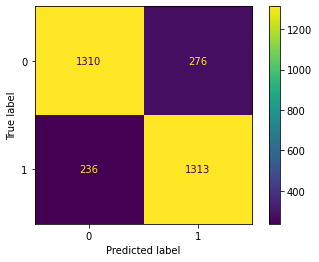

In [52]:
print("\nMatriz de confusion (Train):\n", confusion_matrix(y_train, lr.predict(x_train)))
plot_confusion_matrix(lr, x_train, y_train, values_format="d")

Matriz de confusion (Test):
 [[527 127]
 [ 92 598]]


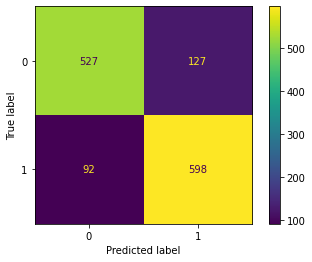

In [53]:
print("Matriz de confusion (Test):\n", confusion_matrix(y_test, lr.predict(x_test)))
plot_confusion_matrix(lr, x_test, y_test, values_format="d")

## Decision Tree

In [54]:
# Armando un simple arbol de decisión
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(x_train, y_train)

print('Acc (Train): ', tree.score(x_train, y_train))
print('Acc (Test): ', tree.score(x_test, y_test))

Acc (Train):  0.9885167464114832
Acc (Test):  0.9821428571428571



Matriz de confusion (Train):
 [[1553   33]
 [   3 1546]]


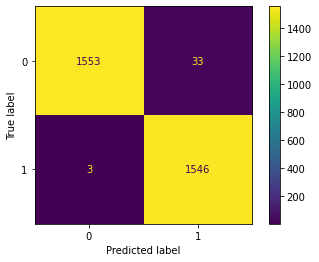

In [55]:
print("\nMatriz de confusion (Train):\n", confusion_matrix(y_train, tree.predict(x_train)))
plot_confusion_matrix(tree, x_train, y_train, values_format="d")

Matriz de confusion (Test):
 [[634  20]
 [  4 686]]


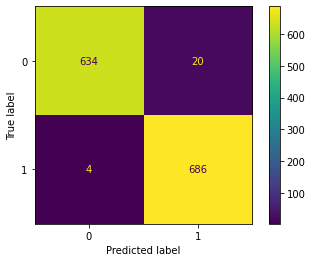

In [56]:
print("Matriz de confusion (Test):\n", confusion_matrix(y_test, tree.predict(x_test)))
plot_confusion_matrix(tree, x_test, y_test, values_format="d")

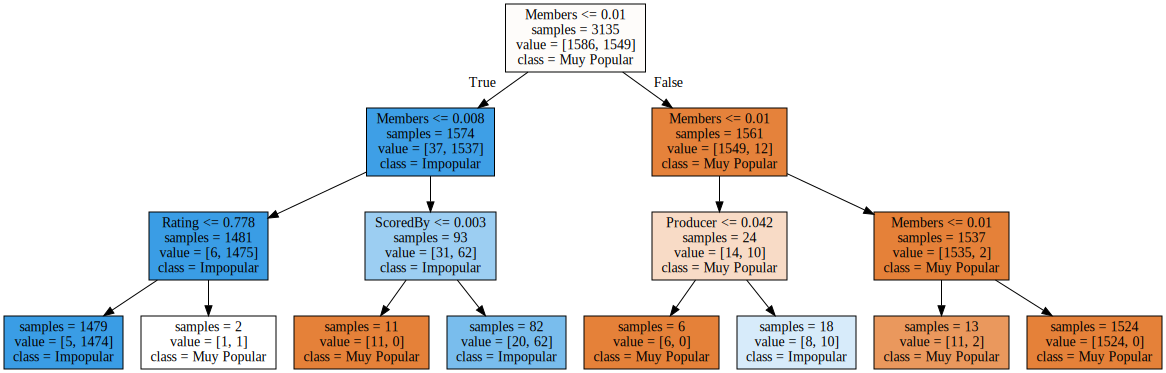

In [57]:
# Dibujando el modelo
export_graphviz(tree, out_file="tree.dot", class_names=['Muy Popular', 'Impopular'], 
                feature_names=col_names,  impurity=False,filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [58]:
!dot -Tjpeg tree.dot -o arbol_decision_personal.jpeg

## Analisis de AdaBoost

In [59]:
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=1.5)

ada = ada.fit(x_train, y_train)

print('Acc (Train): ', ada.score(x_train, y_train))
print('Acc (Test): ', ada.score(x_test, y_test))

Acc (Train):  1.0
Acc (Test):  0.9851190476190477



Matriz de confusion (Train):
 [[1586    0]
 [   0 1549]]


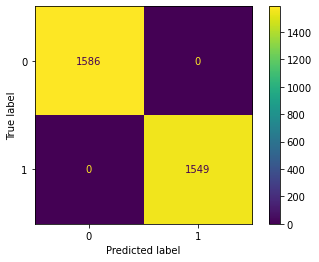

In [60]:
print("\nMatriz de confusion (Train):\n", confusion_matrix(y_train, ada.predict(x_train)))
plot_confusion_matrix(ada, x_train, y_train, values_format="d")

Matriz de confusion (Test):
 [[641  13]
 [  7 683]]


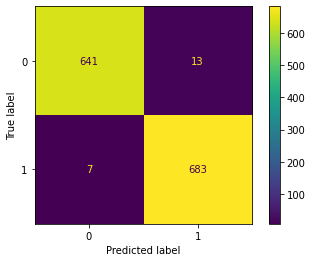

In [61]:
print("Matriz de confusion (Test):\n", confusion_matrix(y_test, ada.predict(x_test)))
plot_confusion_matrix(ada, x_test, y_test, values_format="d")

In [62]:
f=ada.feature_importances_

In [63]:
imp = pd.DataFrame(zip(anime_df[col_names], ada.feature_importances_), columns = ['Caracteristica', 'Importancia'])
imp = imp.sort_values(by = 'Importancia', ascending = False)
imp

Caracteristica  Importancia
6        Members     0.158010
5         Rating     0.157162
7       ScoredBy     0.146714
4         Studio     0.132662
3       Producer     0.122943
8       Episodes     0.102270
2         Source     0.062565
0          Genre     0.062497
1           Type     0.055177

## Random Forest

In [64]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

print('Acc (Train): ', precision_score(y_train, rf.predict(x_train)))
print('Acc (Test): ', precision_score(y_test, rf.predict(x_test)))

Acc (Train):  1.0
Acc (Test):  0.9799713876967096



Matriz de confusion (Train):
 [[1586    0]
 [   0 1549]]


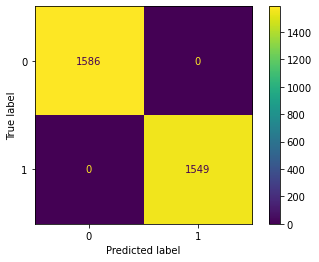

In [65]:
print("\nMatriz de confusion (Train):\n", confusion_matrix(y_train, rf.predict(x_train)))
plot_confusion_matrix(rf, x_train, y_train, values_format="d")

Matriz de confusion (Test):
 [[640  14]
 [  5 685]]


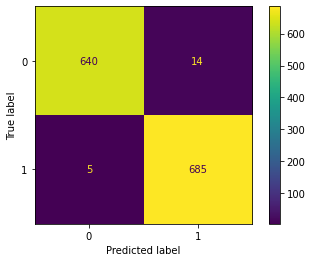

In [66]:
print("Matriz de confusion (Test):\n", confusion_matrix(y_test, rf.predict(x_test)))
plot_confusion_matrix(rf, x_test, y_test, values_format="d")

## SVMs

### Nu-SVM

In [67]:
NU_SVM_1=NuSVC(nu=0.9, kernel="linear", gamma=1, probability=True)
NU_SVM_1.fit(x_train, y_train)

print("Nu-SVM 1: Kernel Lineal")
print('Acc (Train): ', precision_score(y_train, NU_SVM_1.predict(x_train)))
print('Acc (Test): ', precision_score(y_test, NU_SVM_1.predict(x_test)))

NU_SVM_2=NuSVC(nu=0.9, kernel="rbf", gamma=1, probability=True)
NU_SVM_2.fit(x_train, y_train)

print("Nu-SVM 2: Kernel Gaussiano")
print('Acc (Train): ', precision_score(y_train, NU_SVM_2.predict(x_train)))
print('Acc (Test): ', precision_score(y_test, NU_SVM_2.predict(x_test)))

NU_SVM_3=NuSVC(nu=0.9, kernel="sigmoid", gamma=1, probability=True)
NU_SVM_3.fit(x_train, y_train)

print("Nu-SVM 3: Kernel Sigmoidal")
print('Acc (Train): ', precision_score(y_train, NU_SVM_3.predict(x_train)))
print('Acc (Test): ', precision_score(y_test, NU_SVM_3.predict(x_test)))


Nu-SVM 1: Kernel Lineal
Acc (Train):  0.742741935483871
Acc (Test):  0.7357142857142858
Nu-SVM 2: Kernel Gaussiano
Acc (Train):  0.7150573936529372
Acc (Test):  0.7049180327868853
Nu-SVM 3: Kernel Sigmoidal
Acc (Train):  0.7320205479452054
Acc (Test):  0.761996161228407


#### NU-SVM 1


Matriz de confusion (Train) :
 [[1267  319]
 [ 628  921]]


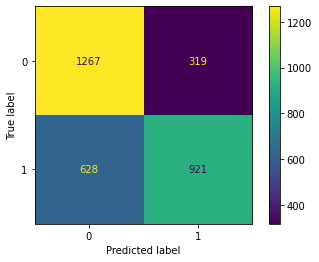

In [68]:
print("\nMatriz de confusion (Train) :\n", confusion_matrix(y_train, NU_SVM_1.predict(x_train)))
plot_confusion_matrix(NU_SVM_1, x_train, y_train, values_format="d")

Matriz de confusion (Test):
 [[506 148]
 [278 412]]


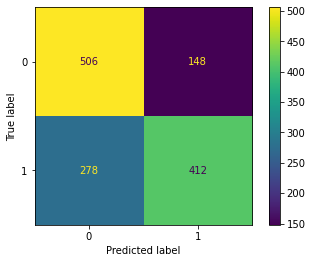

In [69]:
print("Matriz de confusion (Test):\n", confusion_matrix(y_test, NU_SVM_1.predict(x_test)))
plot_confusion_matrix(NU_SVM_1, x_test, y_test, values_format="d")

#### NU-SVM 2


Matriz de confusion (Train) :
 [[1164  422]
 [ 490 1059]]


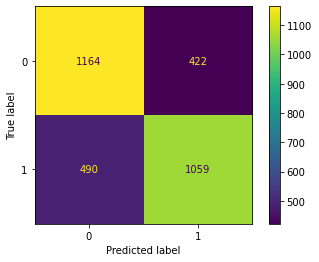

In [70]:
print("\nMatriz de confusion (Train) :\n", confusion_matrix(y_train, NU_SVM_2.predict(x_train)))
plot_confusion_matrix(NU_SVM_2, x_train, y_train, values_format="d")

Matriz de confusion (Test):
 [[456 198]
 [217 473]]


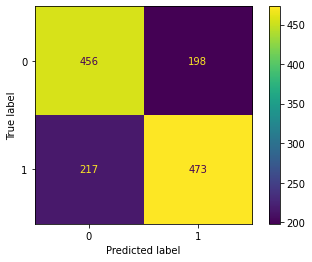

In [71]:
print("Matriz de confusion (Test):\n", confusion_matrix(y_test, NU_SVM_2.predict(x_test)))
plot_confusion_matrix(NU_SVM_2, x_test, y_test, values_format="d")

#### NU-SVM 3


Matriz de confusion (Train) :
 [[1273  313]
 [ 694  855]]


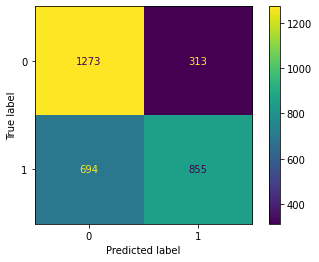

In [72]:
print("\nMatriz de confusion (Train) :\n", confusion_matrix(y_train, NU_SVM_3.predict(x_train)))
plot_confusion_matrix(NU_SVM_3, x_train, y_train, values_format="d")

Matriz de confusion (Test):
 [[530 124]
 [293 397]]


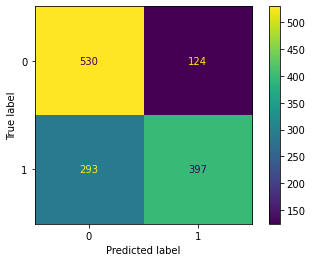

In [73]:
print("Matriz de confusion (Test):\n", confusion_matrix(y_test, NU_SVM_3.predict(x_test)))
plot_confusion_matrix(NU_SVM_3, x_test, y_test, values_format="d")

### C-SVM

In [74]:
SVM_1=SVC(C=10, kernel="linear", gamma=1, probability=True)
SVM_1.fit(x_train, y_train)

print("SVM 1: Kernel Lineal")
print('Acc (Train): ', precision_score(y_train, SVM_1.predict(x_train)))
print('Acc (Test): ', precision_score(y_test, SVM_1.predict(x_test)))

SVM_2=SVC(C=10, kernel="rbf", gamma=1, probability=True)
SVM_2.fit(x_train, y_train)

print("SVM 2: Kernel Gaussiano")
print('Acc (Train): ', precision_score(y_train, SVM_2.predict(x_train)))
print('Acc (Test): ', precision_score(y_test, SVM_2.predict(x_test)))

SVM_3=SVC(C=10, kernel="sigmoid", gamma=1, probability=True)
SVM_3.fit(x_train, y_train)

print("SVM 3: Kernel Sigmoidal")
print('Acc (Train): ', precision_score(y_train, SVM_3.predict(x_train)))
print('Acc (Test): ', precision_score(y_test, SVM_3.predict(x_test)))

SVM 1: Kernel Lineal
Acc (Train):  0.8838672768878718
Acc (Test):  0.8778625954198473
SVM 2: Kernel Gaussiano
Acc (Train):  0.9144225014961102
Acc (Test):  0.889920424403183
SVM 3: Kernel Sigmoidal
Acc (Train):  0.5200258397932817
Acc (Test):  0.5592705167173252


#### C-SVM 1


Matriz de confusion (Train) :
 [[1383  203]
 [   4 1545]]


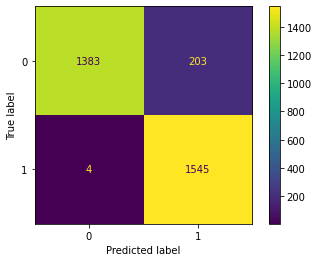

In [75]:
print("\nMatriz de confusion (Train) :\n", confusion_matrix(y_train, SVM_1.predict(x_train)))
plot_confusion_matrix(SVM_1, x_train, y_train, values_format="d")

Matriz de confusion (Test):
 [[558  96]
 [  0 690]]


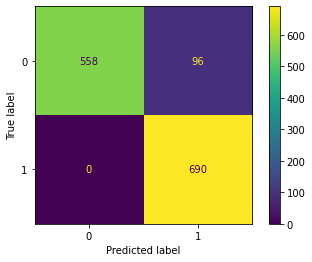

In [76]:
print("Matriz de confusion (Test):\n", confusion_matrix(y_test, SVM_1.predict(x_test)))
plot_confusion_matrix(SVM_1, x_test, y_test, values_format="d")

#### C-SVM 2


Matriz de confusion (Train) :
 [[1443  143]
 [  21 1528]]


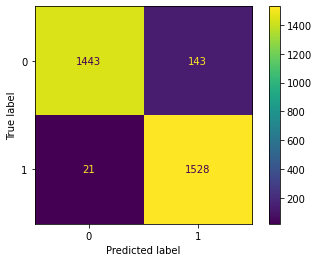

In [77]:
print("\nMatriz de confusion (Train) :\n", confusion_matrix(y_train, SVM_2.predict(x_train)))
plot_confusion_matrix(SVM_2, x_train, y_train, values_format="d")

Matriz de confusion (Test):
 [[571  83]
 [ 19 671]]


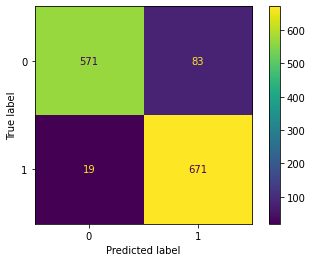

In [78]:
print("Matriz de confusion (Test):\n", confusion_matrix(y_test, SVM_2.predict(x_test)))
plot_confusion_matrix(SVM_2, x_test, y_test, values_format="d")

#### C-SVM 3


Matriz de confusion (Train) :
 [[843 743]
 [744 805]]


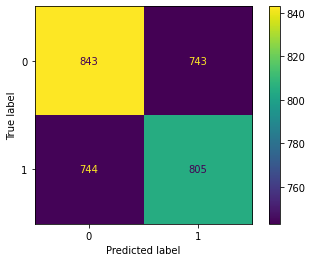

In [79]:
print("\nMatriz de confusion (Train) :\n", confusion_matrix(y_train, SVM_3.predict(x_train)))
plot_confusion_matrix(SVM_3, x_train, y_train, values_format="d")

Matriz de confusion (Test):
 [[364 290]
 [322 368]]


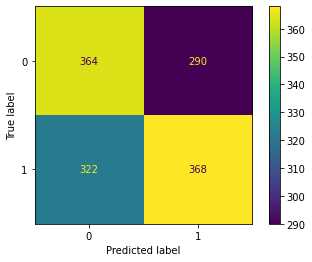

In [80]:
print("Matriz de confusion (Test):\n", confusion_matrix(y_test, SVM_3.predict(x_test)))
plot_confusion_matrix(SVM_3, x_test, y_test, values_format="d")

## Clasificador Bayesiano

In [81]:
Bayessiano= GaussianNB()
Bayessiano.fit(x_train, y_train)

print('Acc (Train): ', precision_score(y_train, Bayessiano.predict(x_train)))
print('Acc (Test): ', precision_score(y_test, Bayessiano.predict(x_test)))

Acc (Train):  0.9580988117573483
Acc (Test):  0.9562146892655368



Matriz de confusion (Train) :
 [[1519   67]
 [  17 1532]]


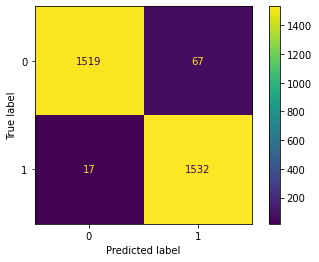

In [82]:
print("\nMatriz de confusion (Train) :\n", confusion_matrix(y_train, Bayessiano.predict(x_train)))
plot_confusion_matrix(Bayessiano, x_train, y_train, values_format="d")

Matriz de confusion (Test):
 [[623  31]
 [ 13 677]]


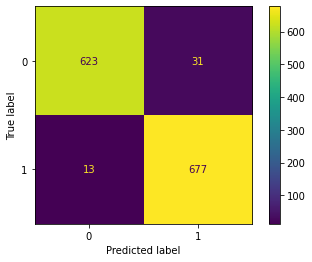

In [83]:
print("Matriz de confusion (Test):\n", confusion_matrix(y_test, Bayessiano.predict(x_test)))
plot_confusion_matrix(Bayessiano, x_test, y_test, values_format="d")

## Red MLP

In [84]:
ES = EarlyStopping(monitor='loss', patience=20)

MLP=Sequential()
MLP.add(Dense(25, input_dim=len(col_names), activation='relu'))
MLP.add(Dense(25, activation='relu'))
MLP.add(Dropout(0.3))
MLP.add(Dense(10, activation='relu'))
MLP.add(Dropout(0.3))
MLP.add(Dense(5, activation='relu'))
MLP.add(Dense(1, activation='softmax'))

MLP.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                250       
_________________________________________________________________
dense_1 (Dense)              (None, 25)                650       
_________________________________________________________________
dropout (Dropout)            (None, 25)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                260       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6

In [85]:
# Compilacion del modelo
MLP.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Ajuste del modelo
MLP.fit(x_train, y_train, epochs=200, batch_size=10, callbacks=[ES])

Epoch 1/200
314/314 [==============================] - 3s 2ms/step - loss: 0.6829 - accuracy: 0.4881
Epoch 2/200
314/314 [==============================] - 1s 3ms/step - loss: 0.6061 - accuracy: 0.4809
Epoch 3/200
314/314 [==============================] - 1s 3ms/step - loss: 0.5046 - accuracy: 0.4834
Epoch 4/200
314/314 [==============================] - 1s 3ms/step - loss: 0.3976 - accuracy: 0.4963
Epoch 5/200
314/314 [==============================] - 1s 3ms/step - loss: 0.2677 - accuracy: 0.4893
Epoch 6/200
314/314 [==============================] - 1s 3ms/step - loss: 0.2157 - accuracy: 0.4831
Epoch 7/200
314/314 [==============================] - 1s 3ms/step - loss: 0.1836 - accuracy: 0.4994
Epoch 8/200
314/314 [==============================] - 1s 3ms/step - loss: 0.1945 - accuracy: 0.4950
Epoch 9/200
314/314 [==============================] - 1s 2ms/step - loss: 0.1361 - accuracy: 0.4985
Epoch 10/200
314/314 [==============================] - 1s 3ms/step - loss: 0.1298 - accura

In [86]:
prediction = MLP.evaluate(x_test, y_test, verbose=0)
print('Loss (Test): ',prediction[0])
print('Acc  (Test):', prediction[1])

Loss (Test):  0.09487316012382507
Acc  (Test): 0.5133928656578064



Matriz de confusion (Train):
 [[   0 1586]
 [   0 1549]]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


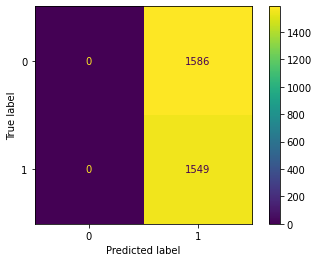

In [87]:
cm_train=confusion_matrix(y_train, MLP.predict_classes(x_train))
print("\nMatriz de confusion (Train):\n", cm_train)

dis_cmd_train= ConfusionMatrixDisplay(cm_train, display_labels=["0", "1"]).plot(values_format='d')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



Matriz de confusion (Test):
 [[  0 654]
 [  0 690]]


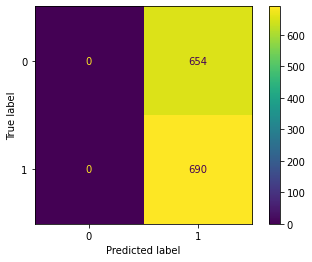

In [88]:
cm_test=confusion_matrix(y_test, MLP.predict_classes(x_test))
print("\nMatriz de confusion (Test):\n", cm_test)

dis_cmd_test= ConfusionMatrixDisplay(cm_test, display_labels=["0", "1"]).plot(values_format='d')

#  Cross Validation

In [89]:
CVs=[]
modelos=[lr, tree, ada, rf, NU_SVM_1, NU_SVM_2, NU_SVM_3, SVM_1, SVM_2, SVM_3, Bayessiano]
for i in range(0, len(modelos)):
  CVs.append(cross_val_score(modelos[i], anime_df[col_names], anime_df['C_Popular'], cv=20))

print("Logistic Regression Accuracy: %0.4f (+/- %0.4f)" % (CVs[0].mean(), CVs[0].std() * 2))
print("Decision Tree Accuracy: %0.4f (+/- %0.4f)" % (CVs[1].mean(), CVs[1].std() * 2))
print("Ada Boosting Accuracy: %0.4f (+/- %0.4f)" % (CVs[2].mean(), CVs[2].std() * 2))
print("Random Forest Accuracy: %0.4f (+/- %0.4f)" % (CVs[3].mean(), CVs[3].std() * 2))
print("NU-SVM 1 Accuracy: %0.4f (+/- %0.4f)" % (CVs[4].mean(), CVs[4].std() * 2))
print("NU-SVM 2 Accuracy: %0.4f (+/- %0.4f)" % (CVs[5].mean(), CVs[5].std() * 2))
print("NU-SVM 3 Accuracy: %0.4f (+/- %0.4f)" % (CVs[6].mean(), CVs[6].std() * 2))
print("C-SVM 1 Accuracy: %0.4f (+/- %0.4f)" % (CVs[7].mean(), CVs[7].std() * 2))
print("C-SVM 2 Accuracy: %0.4f (+/- %0.4f)" % (CVs[8].mean(), CVs[8].std() * 2))
print("C-SVM 3 Accuracy: %0.4f (+/- %0.4f)" % (CVs[9].mean(), CVs[9].std() * 2))
print("Clasificador Bayesiano Accuracy: %0.4f (+/- %0.4f)" % (CVs[10].mean(), CVs[10].std() * 2))

Logistic Regression Accuracy: 0.8412 (+/- 0.0661)
Decision Tree Accuracy: 0.9806 (+/- 0.0258)
Ada Boosting Accuracy: 0.9844 (+/- 0.0232)
Random Forest Accuracy: 0.9859 (+/- 0.0241)
NU-SVM 1 Accuracy: 0.7046 (+/- 0.1053)
NU-SVM 2 Accuracy: 0.7035 (+/- 0.1036)
NU-SVM 3 Accuracy: 0.6870 (+/- 0.0924)
C-SVM 1 Accuracy: 0.9368 (+/- 0.0616)
C-SVM 2 Accuracy: 0.9350 (+/- 0.0601)
C-SVM 3 Accuracy: 0.5295 (+/- 0.1111)
Clasificador Bayesiano Accuracy: 0.9698 (+/- 0.0389)
